simpsons dataset -- https://www.kaggle.com/datasets/mathurinache/simpsons-images

poem -- https://www.kaggle.com/datasets/ramjasmaurya/poem-classification-nlp

In [1]:
import pandas as pd

# Повнозв'язані нейронні мережі
Вирішіть завдання класифікації даних, з якими ви працювали в лабораторній № 1 за допомогою повнозв’язаної нейромережі прямого поширення (fully connected feed-forward network). Результати порівняйте з одержаними раніше.

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data/train.csv')
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [ ]:
df=df.dropna()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df.dropna().iloc[:,:-1])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.dropna()['Activity'])
y=le.transform(df.dropna()['Activity'])

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(X_std, y)
print(X_selected.shape)

(7352, 10)


In [ ]:
selected_feature_names = df.iloc[:,:-1].columns[fs.get_support()]

In [ ]:
new_df=df[selected_feature_names]

In [ ]:
pca=PCA(n_components=3)
pca.fit(new_df)
df_pca=pca.transform(new_df)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
data=pd.DataFrame(data=df_pca)

In [ ]:
data['label']=df['Activity']
data

,0,1,2,label
0,-1.402431,-1.286171,0.072414,STANDING
1,-1.421632,-1.306583,0.102200,STANDING
2,-1.369166,-1.287022,0.004299,STANDING
3,-1.390602,-1.298473,0.054298,STANDING
4,-1.422930,-1.312590,0.091182,STANDING
...,...,...,...,...
7347,1.882883,0.127582,0.111890,WALKING_UPSTAIRS
7348,1.772344,0.097374,-0.002904,WALKING_UPSTAIRS
7349,1.790958,0.099564,-0.147117,WALKING_UPSTAIRS
7350,1.673868,0.044876,-0.086048,WALKING_UPSTAIRS


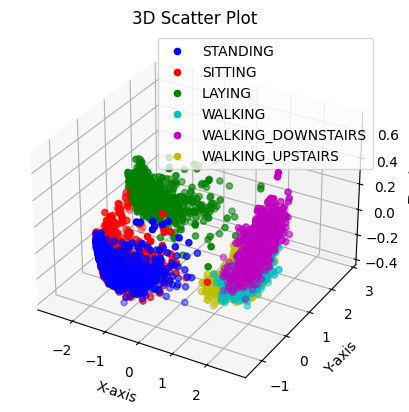

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a color map for the classes
colors = {'STANDING': 'b', 'SITTING': 'r', 'LAYING': 'g', 'WALKING': 'c', 'WALKING_DOWNSTAIRS': 'm','WALKING_UPSTAIRS':'y'}

# Loop through each class and plot its data points with a unique color
for label, color in colors.items():
    class_data = data[data['label'] == label]
    x_class = class_data.iloc[:, 0]
    y_class = class_data.iloc[:, 1]
    z_class = class_data.iloc[:, 2]
    ax.scatter(x_class, y_class, z_class, c=color, label=label)

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Set the title
ax.set_title('3D Scatter Plot')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
pca=PCA(n_components=5)
pca.fit(new_df)
df_pca=pca.transform(new_df)
data=pd.DataFrame(data=df_pca)
data['label']=df['Activity']

In [ ]:
import re
pattern = r"^(tBodyAcc-|tBodyGyro-|fBodyGyro-|fBodyAcc-)"
filtered_lines = [line for line in df.columns if re.match(pattern, line)]
df=df[filtered_lines+['subject','Activity']]

In [ ]:
data=df.copy()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

class SimpleClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

num_classes = 6
learning_rate = 0.003
num_epochs = 500

X = torch.tensor(data.iloc[:,:-1].values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create data loaders for training and testing sets
batch_size = 64
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


<ipython-input-44-6d9131bf7c56>:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.long)


In [ ]:
data.shape[1]

240

In [ ]:
input_size = data.shape[1]-1
hidden_size = 256

model = SimpleClassifier(input_size, hidden_size, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train_loss_history = []
train_accuracy_history = []
train_precision_history = []
train_recall_history = []
train_f1_score_history = []

for epoch in range(num_epochs):
    total_loss = 0.0
    total_predictions = []
    total_true_labels = []

    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Convert predicted classes to CPU and store true labels
        predicted_classes = torch.argmax(outputs, dim=1).cpu().numpy()
        true_labels = labels.cpu().numpy()

        total_predictions.extend(predicted_classes)
        total_true_labels.extend(true_labels)

        total_loss += loss.item()

    # Calculate metrics for the entire training dataset
    accuracy = accuracy_score(total_true_labels, total_predictions)
    precision = precision_score(total_true_labels, total_predictions, average='weighted')
    recall = recall_score(total_true_labels, total_predictions,average='weighted')
    f1 = f1_score(total_true_labels, total_predictions,average='weighted')

    # Calculate the average loss
    avg_loss = total_loss / len(train_loader)

    train_loss_history.append(avg_loss)
    train_accuracy_history.append(accuracy)
    train_precision_history.append(precision)
    train_recall_history.append(recall)
    train_f1_score_history.append(f1)
    if not epoch % 10:
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

print('Training complete!')



Epoch [1/500], Loss: 0.8238, Accuracy: 0.6247, Precision: 0.6247, Recall: 0.6247, F1 Score: 0.6234
Epoch [11/500], Loss: 0.2386, Accuracy: 0.9085, Precision: 0.9086, Recall: 0.9085, F1 Score: 0.9085
Epoch [21/500], Loss: 0.1815, Accuracy: 0.9289, Precision: 0.9289, Recall: 0.9289, F1 Score: 0.9289
Epoch [31/500], Loss: 0.1479, Accuracy: 0.9442, Precision: 0.9442, Recall: 0.9442, F1 Score: 0.9442
Epoch [41/500], Loss: 0.1331, Accuracy: 0.9471, Precision: 0.9471, Recall: 0.9471, F1 Score: 0.9471
Epoch [51/500], Loss: 0.1079, Accuracy: 0.9572, Precision: 0.9572, Recall: 0.9572, F1 Score: 0.9572
Epoch [61/500], Loss: 0.1410, Accuracy: 0.9456, Precision: 0.9456, Recall: 0.9456, F1 Score: 0.9456
Epoch [71/500], Loss: 0.0805, Accuracy: 0.9696, Precision: 0.9696, Recall: 0.9696, F1 Score: 0.9696
Epoch [81/500], Loss: 0.1033, Accuracy: 0.9612, Precision: 0.9612, Recall: 0.9612, F1 Score: 0.9612
Epoch [91/500], Loss: 0.0883, Accuracy: 0.9680, Precision: 0.9680, Recall: 0.9680, F1 Score: 0.9680
E

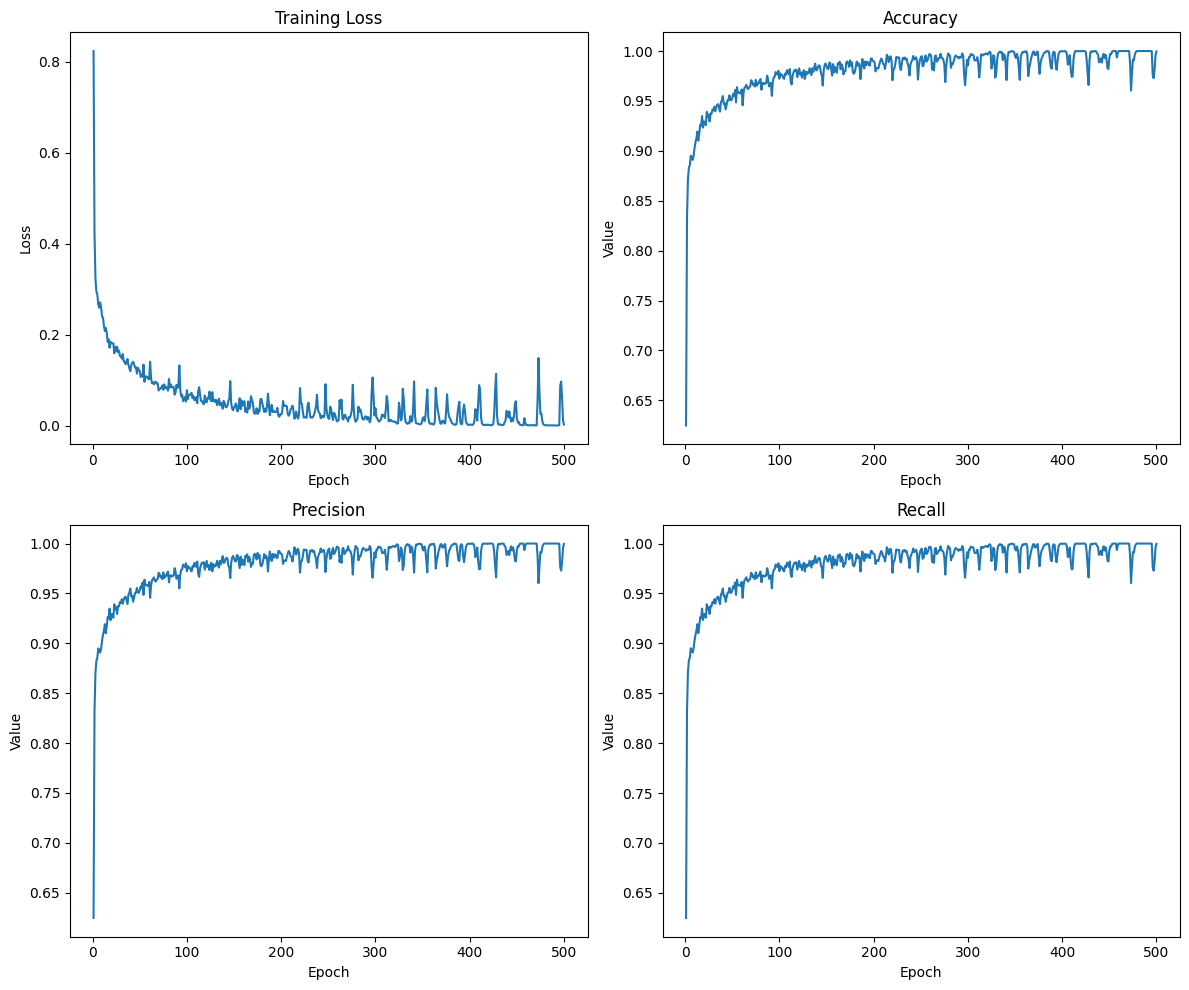

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot loss
axs[0, 0].plot(range(1, num_epochs + 1), train_loss_history, label='Training Loss')
axs[0, 0].set_title('Training Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')

# Plot accuracy
axs[0, 1].plot(range(1, num_epochs + 1), train_accuracy_history, label='Accuracy')
axs[0, 1].set_title('Accuracy')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Value')

# Plot precision
axs[1, 0].plot(range(1, num_epochs + 1), train_precision_history, label='Precision')
axs[1, 0].set_title('Precision')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Value')

# Plot recall
axs[1, 1].plot(range(1, num_epochs + 1), train_recall_history, label='Recall')
axs[1, 1].set_title('Recall')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Value')

# Add a subplot for F1 score if desired

plt.tight_layout()
plt.show()

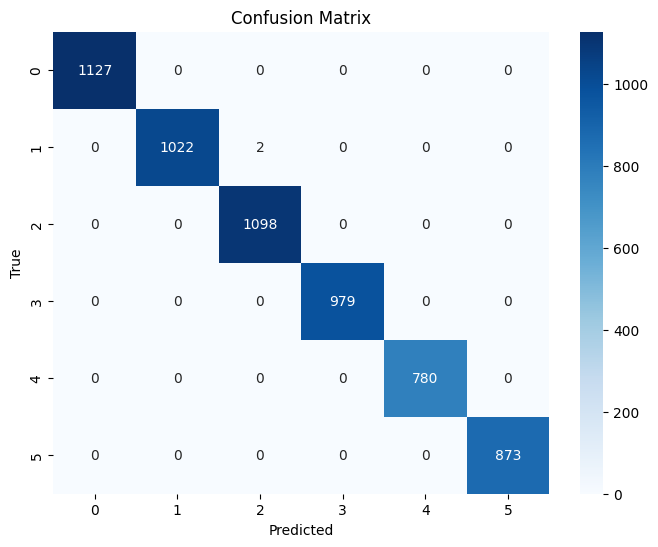

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(total_true_labels, total_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.eval()

# Create an empty list to store predictions
predictions = []

# Iterate through the test_loader to make predictions
with torch.no_grad():
    for inputs, _ in test_loader:  # Iterate through the test data
        outputs = model(inputs)  # Forward pass
        predicted_classes = torch.argmax(outputs, dim=1)  # Get predicted classes
        predictions.extend(predicted_classes.numpy())  # Append predictions to the list

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,target_names=le.classes_))

                    precision    recall  f1-score   support

            LAYING       0.95      0.91      0.93       280
           SITTING       0.88      0.93      0.91       262
          STANDING       0.92      0.91      0.92       276
           WALKING       1.00      1.00      1.00       247
WALKING_DOWNSTAIRS       0.99      1.00      1.00       206
  WALKING_UPSTAIRS       0.99      0.99      0.99       200

          accuracy                           0.95      1471
         macro avg       0.96      0.96      0.96      1471
      weighted avg       0.95      0.95      0.95      1471



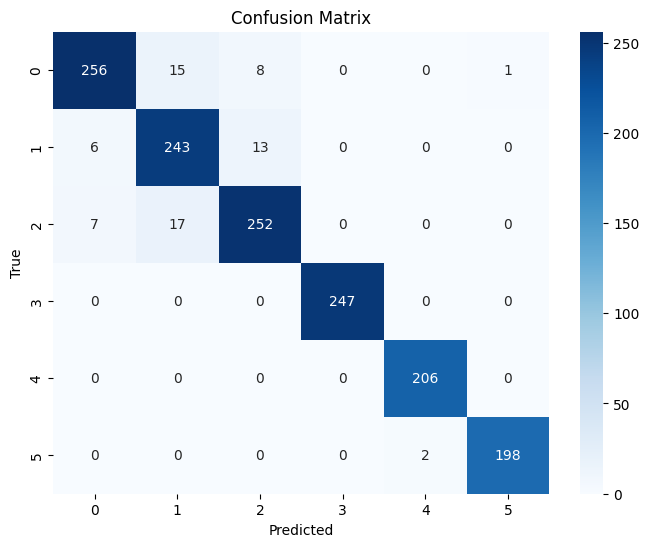

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

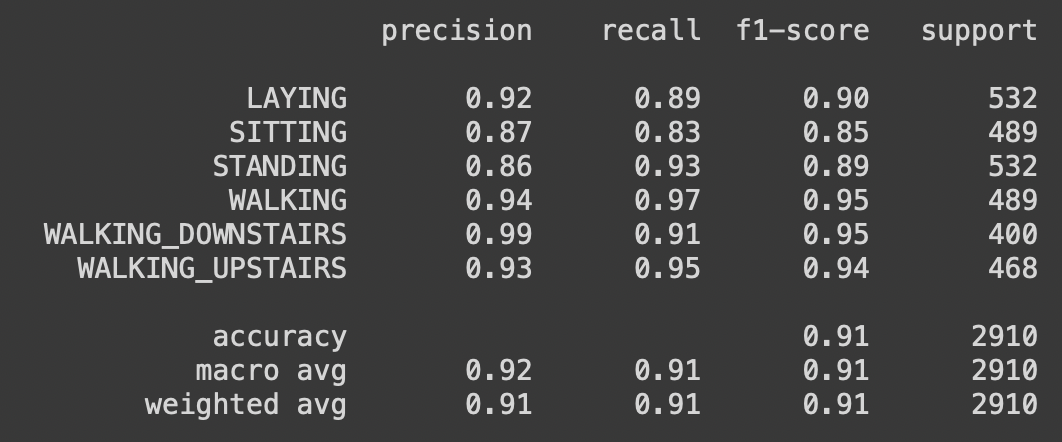

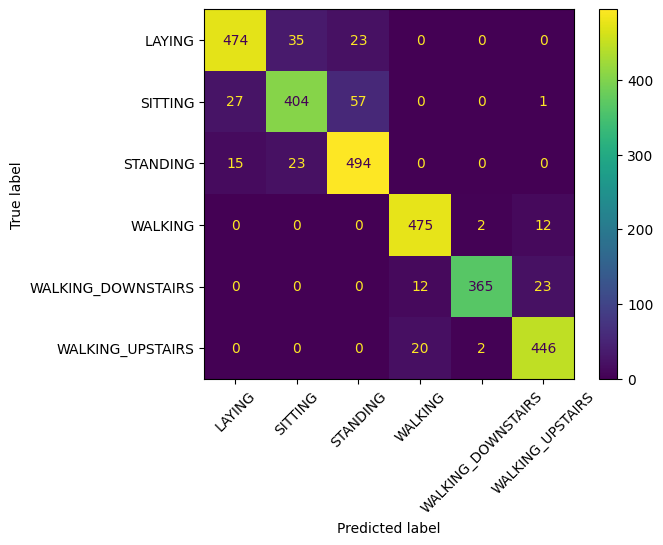

# Згорткові нейронні мережі
Вирішіть завдання класифікації зображень за допомогою згорткової (convolutional) нейромережі (якщо в обраному датасеті класів забагато, достатньо залишити 3-5).

In [ ]:
!unzip '/content/drive/MyDrive/data/simpsons.zip'

In [18]:
import os
import matplotlib.pyplot as plt
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import torch
from torch import nn
import torch.nn.functional as F
from torch.optim import lr_scheduler as lrs
import torchvision as tv
from torchvision.models import resnet18

from torchvision import transforms

In [19]:
data_dir = '/content/archive-3'
data_train_images_path = glob.glob(f'{data_dir}/train/*/*.jpg')
data_train_image_labels = [path.split('/')[-2] for path in data_train_images_path]
train_files_path, valid_files_path = train_test_split(
    data_train_images_path,
    test_size = 0.3,
    stratify=data_train_image_labels
)

data_test_images_path = glob.glob(f'{data_dir}/test/*/*.jpg')
data_test_image_labels = [path.split('/')[-2] for path in data_train_images_path]


print(f'Train len: {len(train_files_path)}\nValid len: {len(valid_files_path)}\nTest len: {len(data_test_images_path)}')

Train len: 10851
Valid len: 4651
Test len: 950


In [20]:
input_size = 224

train_transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.CenterCrop(input_size),
    transforms.ColorJitter(0.9, 0.9, 0.9),
    transforms.RandomAffine(5),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.CenterCrop(input_size),
    transforms.ToTensor(),
])

train_dataset = tv.datasets.ImageFolder(
    data_dir+'/train',
    transform=train_transform,
    is_valid_file=lambda x: x in train_files_path
)

valid_dataset = tv.datasets.ImageFolder(
    data_dir+'/train',
    transform=train_transform,
    is_valid_file=lambda x: x in valid_files_path
)

test_dataset = tv.datasets.ImageFolder(
    data_dir+'/test',
    transform=test_transform,
    is_valid_file=lambda x: x in data_test_images_path
)

In [21]:
len(test_dataset.classes), len(train_dataset.classes), len(valid_dataset.classes)

(19, 19, 19)

In [22]:
import seaborn as sns

In [23]:
sns.set_style(style='white')

def show_images(dataset):
    fig, ax = plt.subplots(
        nrows=2, ncols=3, figsize=(8, 6),
        sharey=True, sharex=True
    )

    for fig_x in ax.flatten():
        idx = np.random.randint(low=0, high=900)
        img, label = dataset[idx]
        fig_x.set_title(dataset.classes[label])
        fig_x.imshow(img.numpy().transpose((1, 2, 0)))

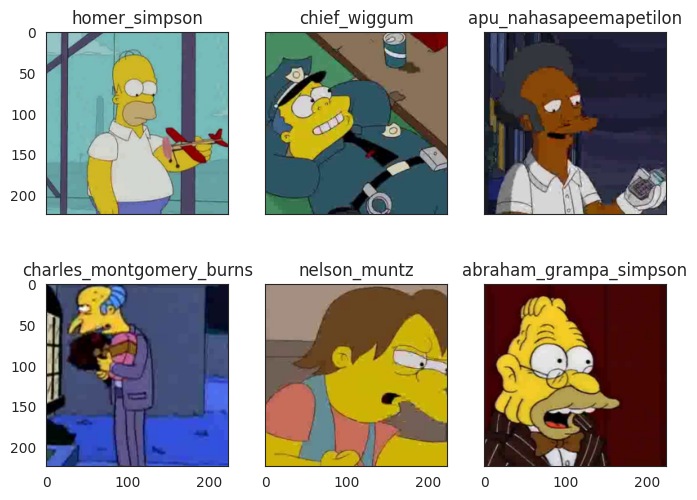

In [24]:
show_images(test_dataset)

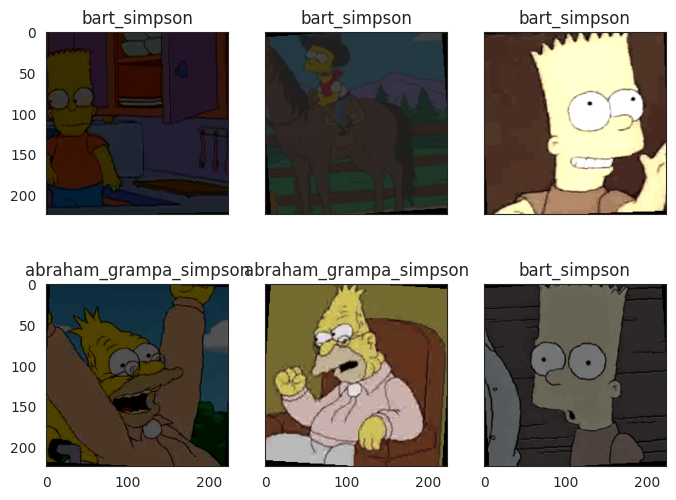

In [25]:
show_images(valid_dataset)

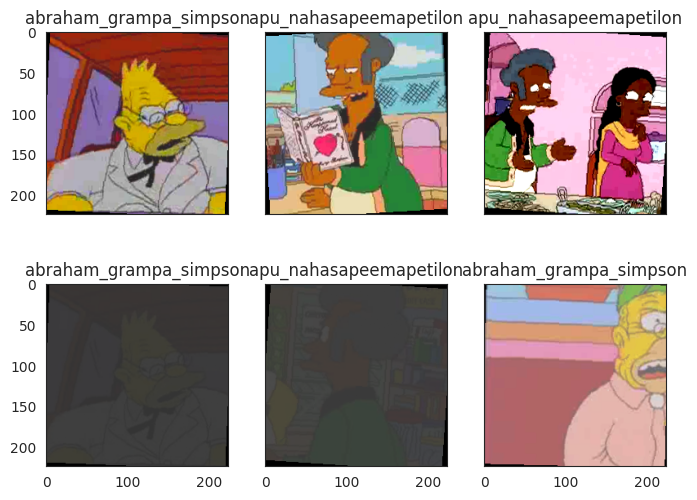

In [26]:
show_images(train_dataset)

In [27]:
train_ds = torch.utils.data.DataLoader(
    train_dataset, batch_size=64, shuffle=True
)

valid_ds=torch.utils.data.DataLoader(
    valid_dataset, batch_size=64, shuffle=True
)

test_ds = torch.utils.data.DataLoader(
    test_dataset, batch_size=64, shuffle=False
)

In [28]:
def plot_learning_curves(history):

    fig = plt.figure(figsize=(20, 7))

    plt.subplot(1,2,1)
    plt.title('loss', fontsize=15)
    plt.plot(history['loss']['train'], label='train')
    plt.plot(history['loss']['val'], label='val')
    plt.ylabel('loss', fontsize=15)
    plt.xlabel('epoch', fontsize=15)
    plt.legend()

    plt.subplot(1,2,2)
    plt.title('acc', fontsize=15)
    plt.plot(history['acc']['train'], label='train')
    plt.plot(history['acc']['val'], label='val')
    plt.ylabel('loss', fontsize=15)
    plt.xlabel('epoch', fontsize=15)
    plt.legend()
    plt.show()

In [29]:
from IPython.display import clear_output
import time

from tqdm.notebook import tqdm
from collections import defaultdict

In [30]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [33]:
def train(
    model,
    criterion,
    optimizer,
    train_batch_gen,
    val_batch_gen,
    num_epochs=10
):

    scheduler = lrs.ReduceLROnPlateau(optimizer, 'min')

    history = defaultdict(lambda: defaultdict(list))

    for epoch in range(num_epochs):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0

        start_time = time.time()

        model.train(True)

        for X_batch, y_batch in train_batch_gen:

            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            logits = model(X_batch)

            loss = criterion(logits, y_batch.long().to(device))

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            train_loss += np.sum(loss.detach().cpu().numpy())
            y_pred = logits.max(1)[1].detach().cpu().numpy()
            train_acc += np.mean(y_batch.cpu().numpy() == y_pred)

        scheduler.step(loss)

        train_loss /= len(train_batch_gen)
        train_acc /= len(train_batch_gen)
        history['loss']['train'].append(train_loss)
        history['acc']['train'].append(train_acc)

        model.train(False)

        for X_batch, y_batch in val_batch_gen:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            logits = model(X_batch)
            loss = criterion(logits, y_batch.long().to(device))
            val_loss += np.sum(loss.detach().cpu().numpy())
            y_pred = logits.max(1)[1].detach().cpu().numpy()
            val_acc += np.mean(y_batch.cpu().numpy() == y_pred)


        val_loss /= len(val_batch_gen)
        val_acc /= len(val_batch_gen)
        history['loss']['val'].append(val_loss)
        history['acc']['val'].append(val_acc)

        print("Epoch {} of {} took {:.3f}s".format(
            epoch + 1, num_epochs, time.time() - start_time))
        print("  training loss (in-iteration): \t{:.6f}".format(train_loss))
        print("  validation loss (in-iteration): \t{:.6f}".format(val_loss))
        print("  training accuracy: \t\t\t{:.2f} %".format(train_acc * 100))
        print("  validation accuracy: \t\t\t{:.2f} %".format(val_acc * 100))

    plot_learning_curves(history)

    return model, history

In [34]:
from torchvision.models import resnet18

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1 of 10 took 129.639s
  training loss (in-iteration): 	2.553740
  validation loss (in-iteration): 	2.241907
  training accuracy: 			22.55 %
  validation accuracy: 			36.62 %
Epoch 2 of 10 took 125.936s
  training loss (in-iteration): 	2.087775
  validation loss (in-iteration): 	1.933733
  training accuracy: 			43.97 %
  validation accuracy: 			48.94 %
Epoch 3 of 10 took 124.061s
  training loss (in-iteration): 	1.825575
  validation loss (in-iteration): 	1.741277
  training accuracy: 			51.89 %
  validation accuracy: 			53.81 %
Epoch 4 of 10 took 123.317s
  training loss (in-iteration): 	1.682749
  validation loss (in-iteration): 	1.608803
  training accuracy: 			55.53 %
  validation accuracy: 			58.66 %
Epoch 5 of 10 took 122.333s
  training loss (in-iteration): 	1.568893
  validation loss (in-iteration): 	1.532402
  training accuracy: 			58.10 %
  validation accuracy: 			58.62 %
Epoch 6 of 10 took 119.757s
  training loss (in-iteration): 	1.485669
  validation loss (in-iteratio

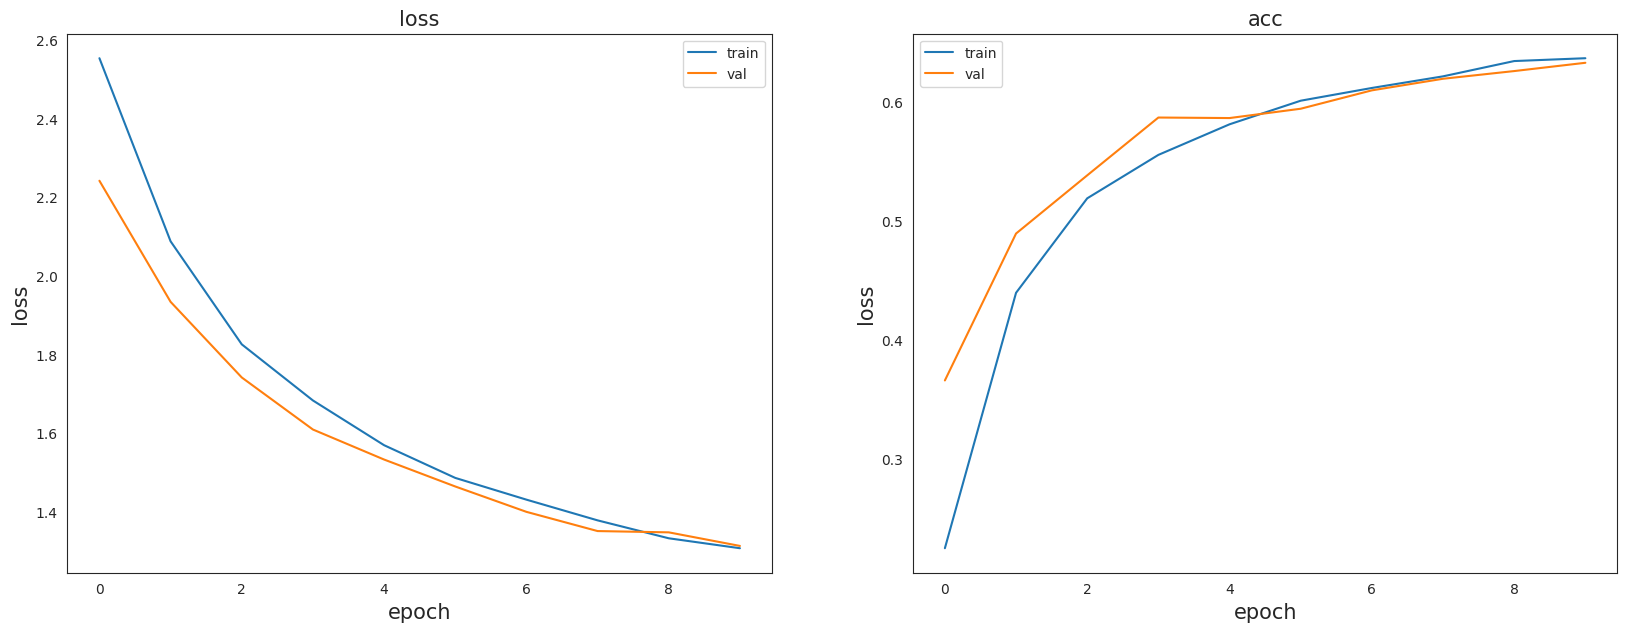

In [35]:
model_fe = resnet18(pretrained=True)

# freeze all layers
for param in model_fe.parameters():
    param.requires_grad = False

# add a classification layer above the feature extractor network
model_fe.fc = torch.nn.Linear(512, 19)
model_fe = model_fe.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_fe.parameters(), lr=0.01)

clf_model, history = train(
    model_fe, criterion, optimizer,
    train_ds, valid_ds,
    num_epochs=10
)

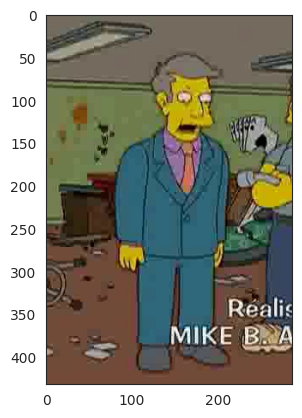

In [36]:
from PIL import Image, ImageFile

path='/content/archive-3/test/principal_skinner/pic_0488.jpg'
img = Image.open(path)
plt.imshow(img)
plt.show()
img = test_transform(img).to(device)
img = torch.unsqueeze(img, 0)
clf_model.eval()
prediction = F.softmax(clf_model(img), dim = 1)

In [40]:
torch.argmax(prediction)

tensor(17, device='cuda:0')

In [41]:
test_dataset.classes[torch.argmax(prediction)]

'principal_skinner'

In [53]:
torch.save(clf_model, 'resnet18_model.pth')

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def predict(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    predictions = []
    true_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return true_labels, predictions

# Make predictions on the test set
true_labels, predictions = predict(clf_model, test_ds)

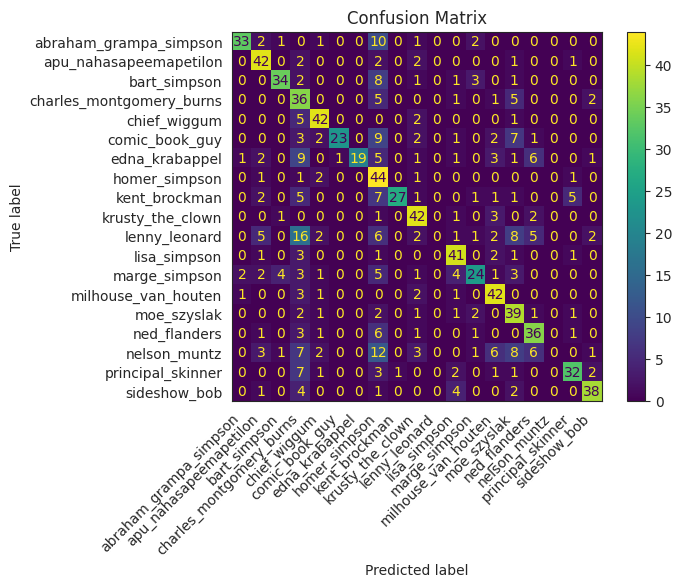

In [49]:
cm = confusion_matrix(true_labels, predictions, labels=range(19))
classes = [str(i) for i in range(19)]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_dataset.classes)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

In [50]:
from sklearn.metrics import classification_report
report = classification_report(true_labels, predictions, target_names=test_dataset.classes)
print("Classification Report:\n", report)

Classification Report:
                           precision    recall  f1-score   support

  abraham_grampa_simpson       0.89      0.66      0.76        50
  apu_nahasapeemapetilon       0.68      0.84      0.75        50
            bart_simpson       0.83      0.68      0.75        50
charles_montgomery_burns       0.32      0.72      0.45        50
            chief_wiggum       0.75      0.84      0.79        50
          comic_book_guy       0.96      0.46      0.62        50
          edna_krabappel       1.00      0.38      0.55        50
           homer_simpson       0.35      0.88      0.50        50
           kent_brockman       0.96      0.54      0.69        50
        krusty_the_clown       0.67      0.84      0.74        50
           lenny_leonard       0.00      0.00      0.00        50
            lisa_simpson       0.69      0.82      0.75        50
           marge_simpson       0.69      0.48      0.56        50
     milhouse_van_houten       0.66      0.84      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
test_dataset.classes

['abraham_grampa_simpson',
 'apu_nahasapeemapetilon',
 'bart_simpson',
 'charles_montgomery_burns',
 'chief_wiggum',
 'comic_book_guy',
 'edna_krabappel',
 'homer_simpson',
 'kent_brockman',
 'krusty_the_clown',
 'lenny_leonard',
 'lisa_simpson',
 'marge_simpson',
 'milhouse_van_houten',
 'moe_szyslak',
 'ned_flanders',
 'nelson_muntz',
 'principal_skinner',
 'sideshow_bob']

In [42]:
model_fe = resnet18(pretrained=True)

# freeze all layers
for param in model_fe.parameters():
    param.requires_grad = False

predicted_labels = []
clf_model.eval()
with torch.no_grad():
    for inputs, _ in test_ds:
        outputs = clf_model(inputs)
        _, predicted = torch.max(outputs, 1)
        predicted_labels.extend(predicted.numpy())

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


RuntimeError: ignored

In [17]:
from sklearn.metrics import classification_report

state_dict = torch.load('/content/resnet18_model.pth')
model_fe.load_state_dict(state_dict)

TypeError: ignored

In [13]:
state_dict

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Рекурентні нейронні мережі
Вирішіть задачу класифікації текстів (з якими ви працювали в лабораторній № 2) за допомогою рекурентної нейромережі. Результати порівняйте з одержаними раніш.

In [152]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.2 MB/s eta 0:00:00


In [170]:
import pandas as pd
import numpy as np
import pandas as pd
import warnings
from sklearn import preprocessing
warnings.simplefilter('ignore')
import random

# neural network library
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras import preprocessing
from keras_preprocessing.text import Tokenizer

val_file = '/content/Poem_classification - test_data.csv'
train_file = '/content/Poem_classification - train_data.csv'

train = pd.read_csv(train_file)
val = pd.read_csv(val_file)

# drop NULLs in training data
train.dropna(inplace=True)
train.reset_index(inplace=True, drop=True)

# stat
print(f"training records: {train.shape[0]} and validation records: {val.shape[0]}")

training records: 837 and validation records: 150


In [171]:
# params
max_features = int(sum([len(txt.split()) for txt in train['Poem']]) /2) # top n words to consider
maxlen = max([len(txt.split()) for txt in train['Poem']])  # first n words to consider

In [172]:
label_encoder = preprocessing.LabelEncoder()
train['Genre_Code']= label_encoder.fit_transform(train['Genre'])
val['Genre_Code']= label_encoder.fit_transform(val['Genre'])

In [173]:
tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')

# training data
tokenizer.fit_on_texts(train['Poem'])
x_train = np.array(tokenizer.texts_to_sequences(train['Poem']))
y_train = np.array(train['Genre_Code'])

# validation data
tokenizer.fit_on_texts(val['Poem'])
x_val = np.array(tokenizer.texts_to_sequences(val['Poem']))
y_val = np.array(val['Genre_Code'])

x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

In [212]:
unit=32
lr=0.001
size=32
epoch=5

In [220]:
inputs = keras.Input(shape=(None,), dtype="int32")
x = layers.Embedding(max_features, unit)(inputs)
x = layers.Bidirectional(layers.LSTM(unit, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(unit))(x)
# Add a classifier
outputs = layers.Dense(4, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [221]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    batch_size=size, epochs=epoch,
                    validation_data=(x_val, y_val))

Epoch 1/5
27/27 [==============================] - 11s 160ms/step - loss: 1.3777 - accuracy: 0.2652 - val_loss: 1.5796 - val_accuracy: 0.1067
Epoch 2/5
27/27 [==============================] - 2s 83ms/step - loss: 1.3535 - accuracy: 0.3274 - val_loss: 1.5599 - val_accuracy: 0.1133
Epoch 3/5
27/27 [==============================] - 3s 96ms/step - loss: 1.1918 - accuracy: 0.4779 - val_loss: 1.6509 - val_accuracy: 0.0933
Epoch 4/5
27/27 [==============================] - 2s 70ms/step - loss: 0.9152 - accuracy: 0.5806 - val_loss: 1.9858 - val_accuracy: 0.1000
Epoch 5/5
27/27 [==============================] - 1s 48ms/step - loss: 0.7036 - accuracy: 0.7025 - val_loss: 2.0464 - val_accuracy: 0.2533


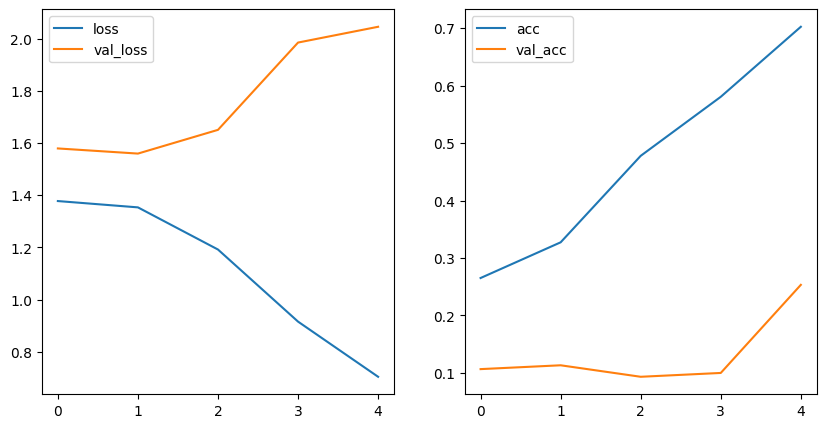

In [222]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(121),plt.plot(history.history['loss'],label='loss'),plt.plot(history.history['val_loss'],label='val_loss'), plt.legend()
plt.subplot(122),plt.plot(history.history['accuracy'],label='acc'),plt.plot(history.history['val_accuracy'],label='val_acc'), plt.legend()
plt.show()

In [223]:
y_pred=model.predict(x_val)
y_pred=np.argmax(y_pred,axis=1)

5/5 [==============================] - 1s 7ms/step


In [224]:
y_pred

array([2, 2, 0, 0, 2, 2, 3, 0, 2, 3, 2, 0, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3,
       2, 3, 2, 0, 0, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 0, 0, 2, 1, 3,
       2, 0, 2, 0, 1, 2, 1, 3, 3, 0, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
       0, 3, 0, 3, 0, 3, 3, 3, 1, 0, 3, 2, 0, 0, 3, 2, 0, 2, 2, 0, 2, 2,
       0, 3, 3, 0, 2, 3, 0, 2, 2, 0, 3, 1, 0, 3, 0, 2, 0, 0, 2, 3, 2, 3,
       2, 3, 3, 2, 0, 0, 2, 0, 2, 3, 1, 0, 0, 3, 3, 2, 3, 3, 2, 0, 3, 3,
       3, 0, 0, 0, 0, 0, 2, 3, 0, 3, 0, 2, 2, 2, 0, 0, 2, 2])

In [225]:
y_val

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [226]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred,target_names=label_encoder.classes_,digits=4))

              precision    recall  f1-score   support

   Affection     0.6087    0.2800    0.3836       100
       Death     0.0000    0.0000    0.0000        13
 Environment     0.1818    0.3200    0.2319        25
       Music     0.0377    0.1667    0.0615        12

    accuracy                         0.2533       150
   macro avg     0.2071    0.1917    0.1692       150
weighted avg     0.4391    0.2533    0.2993       150



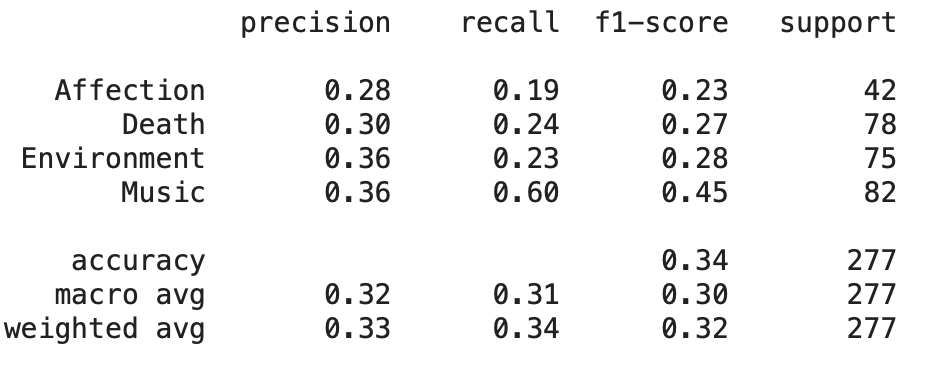